In [4]:
%pip install geopandas osmnx rioxarray matplotlib shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.4 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 4.3 MB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [osmnx]32m4/7 [rasterio]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
import osmnx as ox
import rioxarray
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping

In [8]:
ouaga = gpd.read_file("bfa_admin_boundaries")

/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'bfa_admin_boundaries': 'bfa_admin3_em' (default), 'bfa_admin1_em', 'bfa_admin3', 'bfa_admin2', 'bfa_admin0', 'bfa_adminlines', 'bfa_admin1', 'bfa_admin2_em', 'bfa_admin0_em', 'bfa_adminpoints'. Specify layer parameter to avoid this warning.
  result = read_func(


In [10]:
ouaga = ouaga[ouaga["adm3_name"].str.contains("Ouagadougou", case=False, na=False)]

In [12]:
ouaga

,adm3_name,adm3_name1,adm3_name2,adm3_name3,adm3_pcode,adm2_name,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,...,area_sqkm,version,lang,lang1,lang2,lang3,adm3_ref_n,center_lat,center_lon,geometry
223,Ouagadougou,None,None,None,BF130004,Kadiogo,None,None,None,BF1300,...,550.742456,v02,fr,None,None,None,Ouagadougou,12.379857,-1.548081,"POLYGON ((-1.46186 12.50046, -1.4574 12.49982,..."


<Axes: >

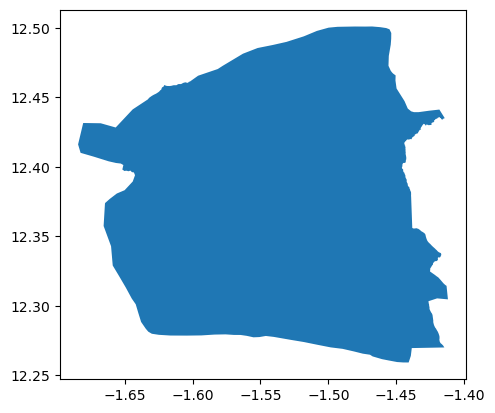

In [13]:
ouaga.plot()

In [15]:
ouaga.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# to change coordinate system to keep it locally - keep it aligned across datasets
ouaga_utm = ouaga.to_crs(epsg=32630)

In [18]:
ouaga_utm.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
ouaga.to_file("Ouaga_local_coord.shp")

/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_on create as date field, though DateTime requested.
  ogr_write(
/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_to create as date field, though DateTime requested.
  ogr_write(


In [14]:
ouaga.to_file("Ouaga.shp")

/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_on create as date field, though DateTime requested.
  ogr_write(
/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field valid_to create as date field, though DateTime requested.
  ogr_write(


<Axes: >

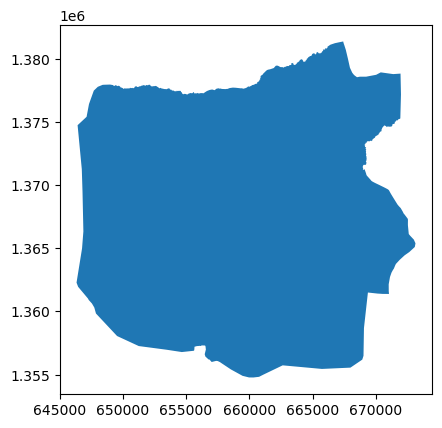

In [21]:
# alternative way to get shapfile, urban information (classifies roads etc) is available including coordinates, not necessarily up to date, not offical - for emergencies
import osmnx as ox

place_name = "Ouagadougou, Burkina Faso"
ouaga2 = ox.geocode_to_gdf(place_name)

# Ensure a projected CRS for area-preserving operations if needed
ouaga2 = ouaga2.to_crs(epsg=32630)
ouaga2.plot()